In [44]:
import numpy as np 
import pandas as pd

In [45]:
def md(x1,x2):
    return np.sum(np.abs(x1-x2))

In [46]:
df=pd.read_csv("./fruit_data_with_colours.csv")
df[:20]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [47]:
from sklearn.model_selection import train_test_split
#Convert Strings to values
df["fruit_name"]=df["fruit_name"].factorize()[0]
df["fruit_subtype"]=df["fruit_subtype"].factorize()[0]
X=df.drop("fruit_label",axis=1).values
y=df["fruit_label"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=40)


In [48]:
from collections import Counter
class KNN:
    def __init__(self,k=5):
        self.k=k
        
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y

    def predict(self,X):
        pred=[self._predict(x) for x in X]
        return pred 
    def _predict(self,x):
        #Manhattan distance from x,x_train to all points
        distances=[md(x,x_train) for x_train in self.X_train]

        #Indices
        k_nearest_indices=np.argsort(distances)[:self.k]
        k_nearest_labels=[self.y_train[i] for i in k_nearest_indices]

        #majority vote
        co=Counter(k_nearest_labels).most_common()
        return co[0][0]


In [49]:
clf=KNN(k=5)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[2, 4, 1, 4, 3, 3, 1, 3, 3, 4, 4, 1]


In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,Y_test))

0.8333333333333334


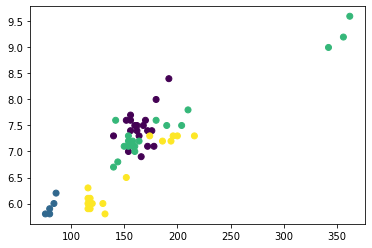

In [54]:
import matplotlib.pyplot as plt
plt.scatter(X[:,2],X[:,3],c=y)
plt.show()